# Seaborn

In [1]:
import seaborn as sns
import pandas as pd

In [ ]:
sns.get_dataset_names()

In [6]:
df=sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [8]:
df.shape

(244, 7)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [10]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [11]:
df.value_counts('smoker')

smoker
No     151
Yes     93
dtype: int64

In [12]:
df['sex'].unique()

['Female', 'Male']
Categories (2, object): ['Male', 'Female']

<Axes: xlabel='total_bill', ylabel='tip'>

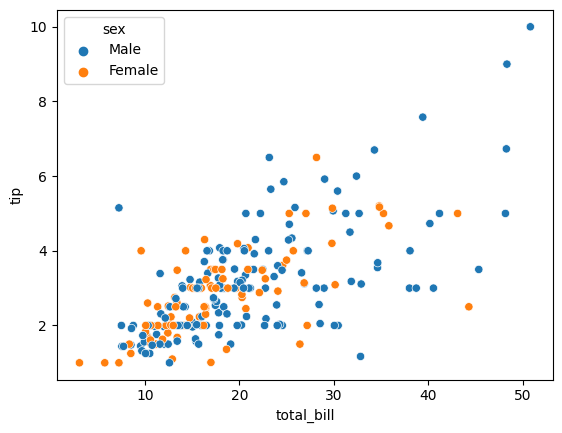

In [15]:
sns.scatterplot(x=df['total_bill'],y=df['tip'],hue=df['sex'])

In [20]:
df['size'].unique()


array([2, 3, 4, 1, 6, 5], dtype=int64)

<Axes: xlabel='total_bill', ylabel='tip'>

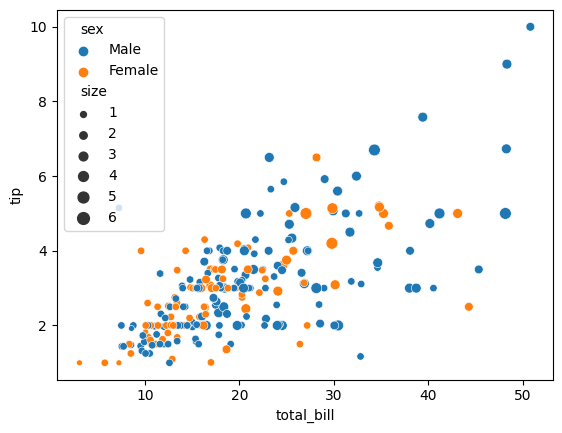

In [16]:
sns.scatterplot(x=df['total_bill'],y=df['tip'],hue=df['sex'],size=df['size'])

<Axes: xlabel='total_bill', ylabel='tip'>

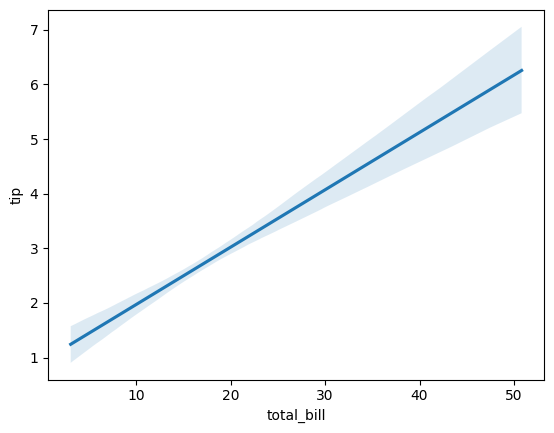

In [23]:
sns.regplot(x=df['total_bill'],y=df['tip'],scatter=False)
# 회귀선 주변의 회색은 신뢰구간을 나타냄

<Axes: xlabel='total_bill', ylabel='tip'>

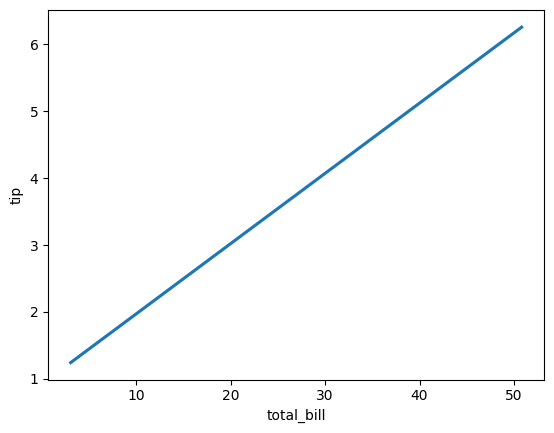

In [24]:
sns.regplot(x=df['total_bill'],y=df['tip'],scatter=False,ci=False)

<Axes: >

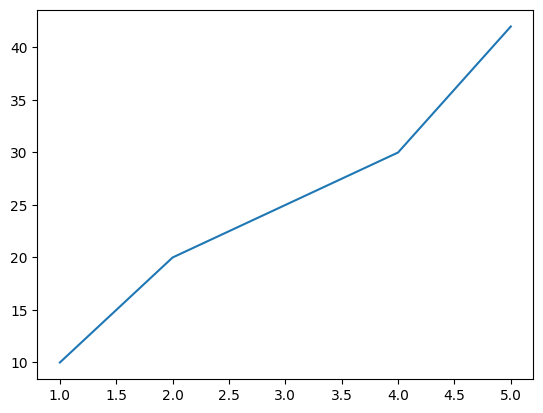

In [26]:
x=[1,2,3,4,5]
y=[10,20,25,30,42]
sns.lineplot(x=x,y=y)

<Axes: xlabel='size', ylabel='tip'>

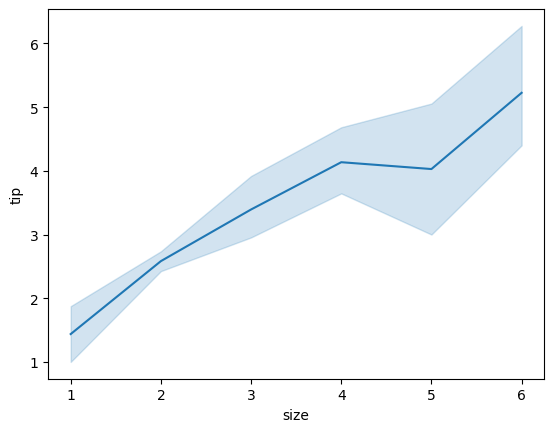

In [27]:
sns.lineplot(x=df['size'],y=df['tip'])
# 하나의 x값에 대하여 여러개의  y값이 있다면 신뢰구간이 나타냄
# ci의 기본값은 95이다.


C:\Users\dgh06\AppData\Local\Temp\ipykernel_2808\461232977.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=df['size'],y=df['tip'],hue=df['day'],ci=None)


<Axes: xlabel='size', ylabel='tip'>

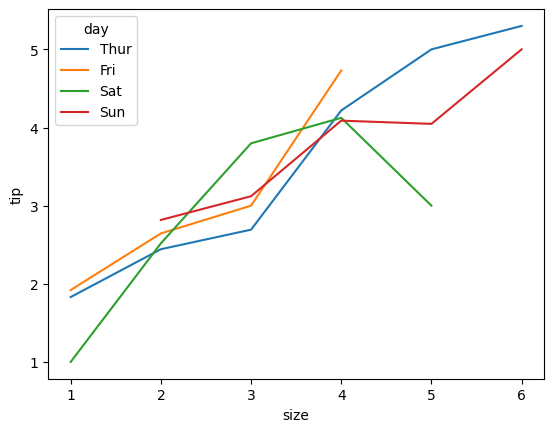

In [29]:
sns.lineplot(x=df['size'],y=df['tip'],hue=df['day'],ci=None)
# hue속성은 범주에 따라 색상을 달리 지정한다.

<Axes: xlabel='size', ylabel='tip'>

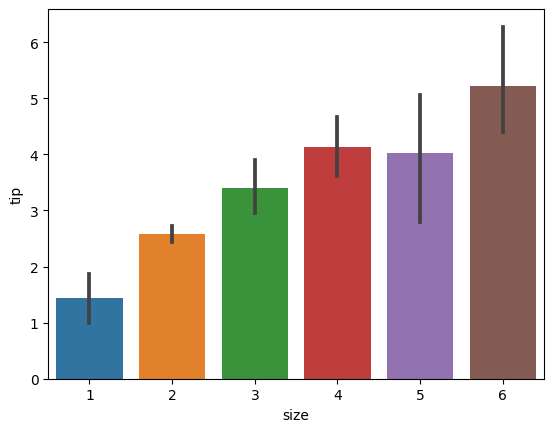

In [30]:
sns.barplot(x=df['size'],y=df['tip'])

C:\Users\dgh06\AppData\Local\Temp\ipykernel_2808\1645330864.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['size'],y=df['tip'],ci=None)


<Axes: xlabel='size', ylabel='tip'>

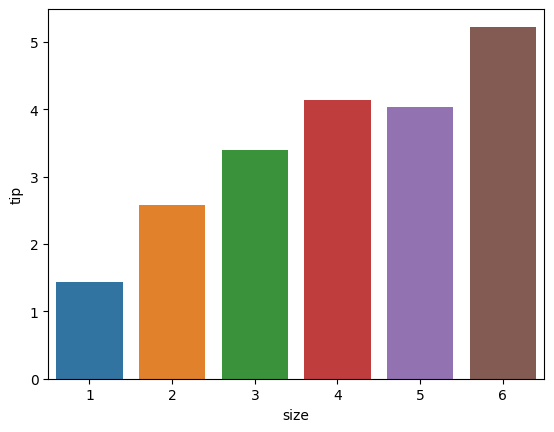

In [31]:
sns.barplot(x=df['size'],y=df['tip'],ci=None)

<Axes: xlabel='day', ylabel='count'>

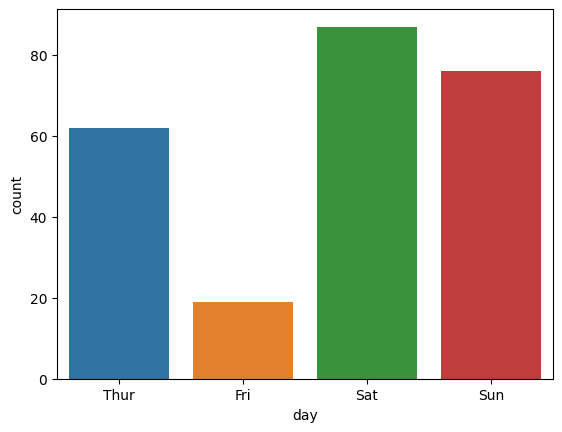

In [32]:
sns.countplot(x=df['day'])

In [33]:
df['day'].value_counts()
# countplot은 value_counts()를 해준 결과를 보여준다

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

<Axes: xlabel='day', ylabel='tip'>

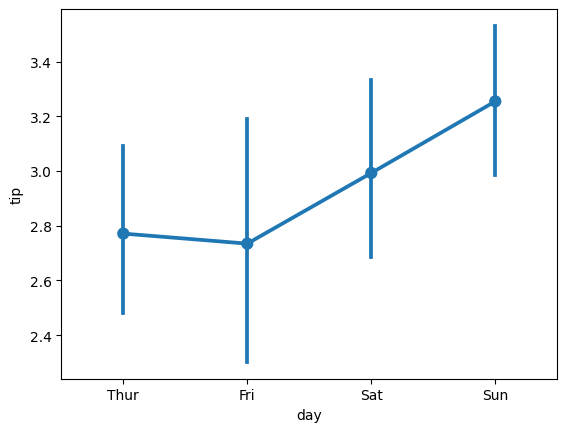

In [35]:
# pointplot은 lineplot에서 막대를 제외하고 평군값을 선으로 잇고 신뢰구간을 함께 표시한 그래프이다.
sns.pointplot(x=df['day'],y=df['tip'])

<Axes: xlabel='size', ylabel='tip'>

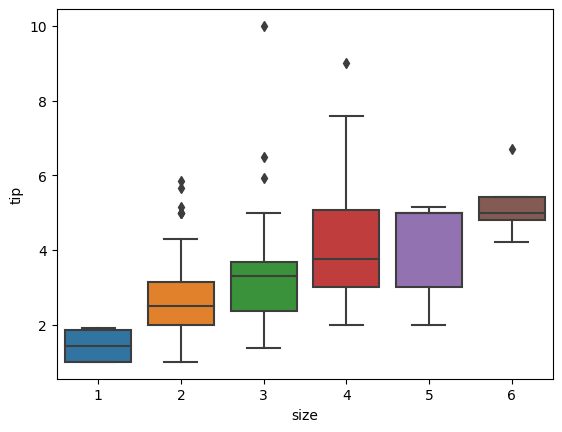

In [36]:
sns.boxplot(x=df['size'],y=df['tip'])

<Axes: xlabel='size', ylabel='tip'>

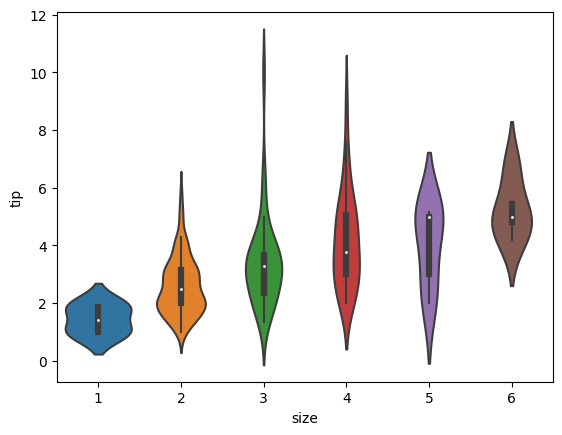

In [37]:
sns.violinplot(x=df['size'],y=df['tip'])

<Axes: xlabel='total_bill', ylabel='Count'>

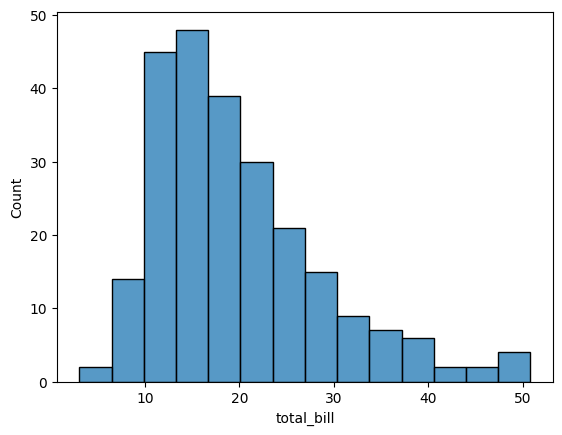

In [38]:
sns.histplot(data=df["total_bill"])

<Axes: xlabel='total_bill', ylabel='Count'>

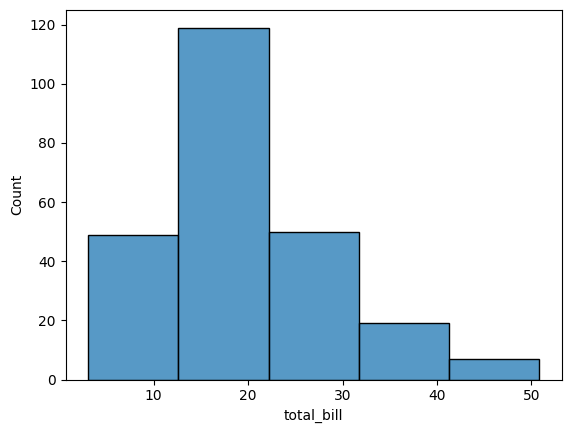

In [39]:
sns.histplot(data=df["total_bill"],bins=5)

<Axes: xlabel='total_bill', ylabel='Count'>

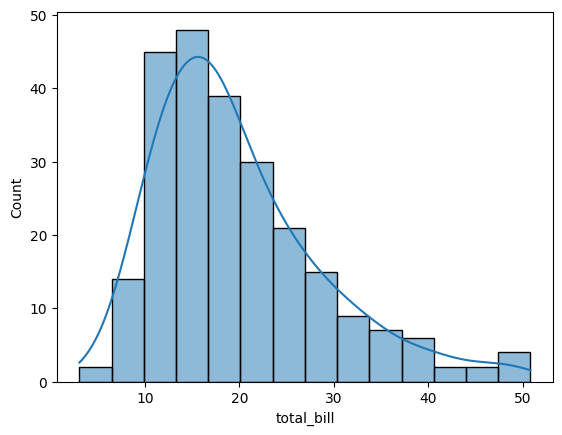

In [40]:
sns.histplot(data=df["total_bill"],kde=True)

In [47]:
df.pivot_table('tip',
               index='day',
               columns='size',
              
               aggfunc='mean')

size,1,2,3,4,5,6
day,,,,,,
Thur,1.83,2.442500,2.692500,4.218000,5.000000,5.3
Fri,1.92,2.644375,3.000000,4.730000,NaN,NaN
Sat,1.00,2.517547,3.797778,4.123846,3.000000,NaN
Sun,NaN,2.816923,3.120667,4.087778,4.046667,5.0


In [51]:
pivot_df=pd.pivot_table(df,
         index='day',
         columns='size',
         values='tip',
         aggfunc='mean')
pivot_df

size,1,2,3,4,5,6
day,,,,,,
Thur,1.83,2.442500,2.692500,4.218000,5.000000,5.3
Fri,1.92,2.644375,3.000000,4.730000,NaN,NaN
Sat,1.00,2.517547,3.797778,4.123846,3.000000,NaN
Sun,NaN,2.816923,3.120667,4.087778,4.046667,5.0


<Axes: xlabel='size', ylabel='day'>

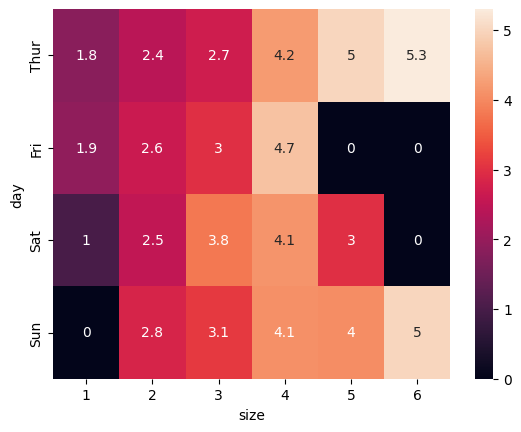

In [58]:
pivot_df.fillna(0,inplace=True)
sns.heatmap(pivot_df,annot=True)

# 

# Matplotlib

In [59]:
import matplotlib.pyplot as plt

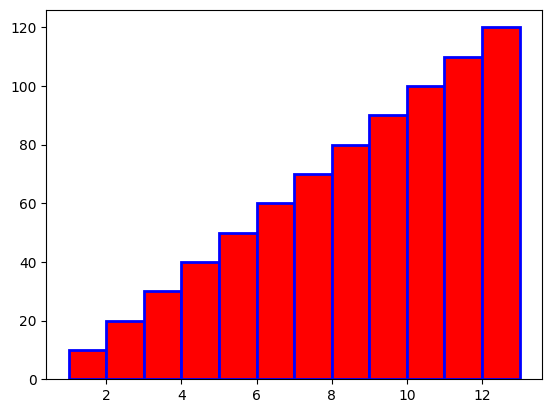

In [62]:
x=[1,2,3,4,5,6,7,8,9,10,11,12]
y=[10,20,30,40,50,60,70,80,90,100,110,120]
plt.bar(x,y,width=1,align='edge',color='red', edgecolor='blue',linewidth=2)
plt.show()

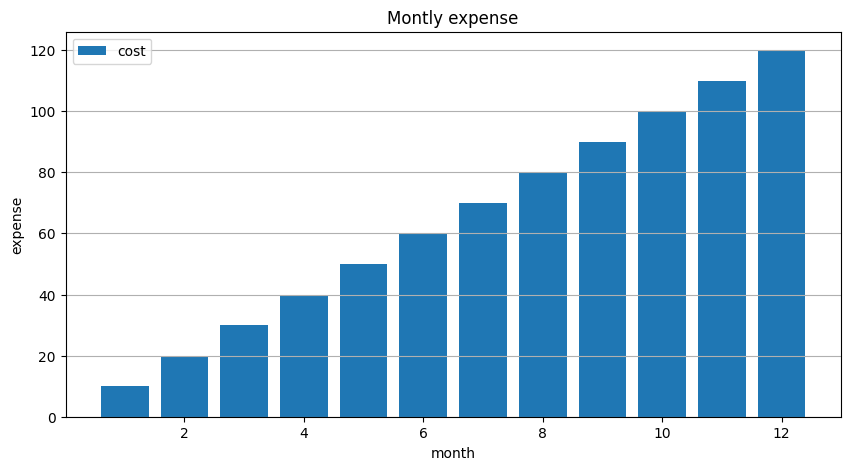

In [69]:
fig=plt.figure(figsize=(10,5))

plt.bar(x,y)
plt.title("Montly expense")
plt.xlabel("month")
plt.ylabel("expense")
plt.legend(["cost"])
plt.grid(True,axis='y')
plt.show()

